Read cytoband or gene data from the database to np.arrays and pickle to disk

In [70]:
import pandas as pd
import numpy as np
import pickle
from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
client = MongoClient()

### Cytoband data from skin, overy, breast

Combined 3 dataset

In [7]:
samples = []
labels = []
for collection in ['skin','ovary','breast']:
    db = client['Rebased'][collection]

    for sam in db.find({ 'cytobands': { '$exists': True, '$ne': None } }):
        amps = []
        dels = []
        features = []
        for band in sam['cytobands']:
            if band['chro'] not in ['X','Y']:
                amps.append(band['ave_dup'])
                dels.append(band['ave_del'])
        features = amps + dels
        samples.append(features)
        labels.append('{}_{}'.format(collection,sam['source']))

Save to disk

In [11]:
feat_mat = np.array(samples)

In [15]:
feat_label = np.array(labels)

In [13]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_bands.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(feat_mat, fo)

In [16]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_bands_label.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(feat_label, fo)

Dump Overy data to disk

In [4]:
samples = []

db = client['Rebased']['ovary']
for sam in db.find({ 'cytobands': { '$exists': True, '$ne': None } }):
    features = []
    for band in sam['cytobands']:
        if band['chro'] not in ['X','Y']:
            features.extend([band['ave_dup'],band['ave_del']])
    samples.append(features)
    
feat_mat = np.array(samples)
with open('/Users/bogao/DataFiles/new landscape/data/ovary_bands.pkl', 'wb') as fo:
    pickle.dump(feat_mat, fo)

Dump Skin data to disk

In [5]:
samples = []

db = client['Rebased']['skin']
for sam in db.find({ 'cytobands': { '$exists': True, '$ne': None } }):
    features = []
    for band in sam['cytobands']:
        if band['chro'] not in ['X','Y']:
            features.extend([band['ave_dup'],band['ave_del']])
    samples.append(features)
    
feat_mat = np.array(samples)
with open('/Users/bogao/DataFiles/new landscape/data/skin_bands.pkl', 'wb') as fo:
    pickle.dump(feat_mat, fo)

### Gene data from skin, breast and ovary

Combined 3 dataset

In [28]:
samples = []
labels = []
for collection in ['skin','ovary','breast']:
    db = client['Rebased'][collection]

    for sam in db.find({ 'genes': { '$exists': True, '$ne': None } }):
        sam_amp = []
        sam_del = []
        for gene in sam['genes']:
            if gene['chro'] not in ['X','Y']:
                sam_amp.append(gene['ave_dup'])
                sam_del.append(gene['ave_del'])
        features = sam_amp + sam_del
        samples.append(features)
        labels.append('{}_{}'.format(collection,sam['source']))
        

Dump to file

In [31]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(np.array(samples), fo)
                
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes_label.pkl'
with open(filepath, 'wb') as fo:
    pickle.dump(np.array(labels), fo)

Breast to file

In [27]:
samples = []

db = client['Rebased']['breast']
for sam in db.find({ 'genes': { '$exists': True, '$ne': None } }):
    sam_amp = []
    sam_del = []
    for gene in sam['genes']:
        if gene['chro'] not in ['X','Y']:
            sam_amp.append(gene['ave_dup'])
            sam_del.append(gene['ave_del'])
    features = sam_amp + sam_del
    samples.append(features)
    
with open('/Users/bogao/DataFiles/new landscape/data/breast_genes.pkl', 'wb') as fo:
    pickle.dump(np.array(samples), fo)

Ovary to file

In [26]:
samples = []

db = client['Rebased']['ovary']
for sam in db.find({ 'genes': { '$exists': True, '$ne': None } }):
    sam_amp = []
    sam_del = []
    for gene in sam['genes']:
        if gene['chro'] not in ['X','Y']:
            sam_amp.append(gene['ave_dup'])
            sam_del.append(gene['ave_del'])
    features = sam_amp + sam_del
    samples.append(features)
    
with open('/Users/bogao/DataFiles/new landscape/data/ovary_genes.pkl', 'wb') as fo:
    pickle.dump(np.array(samples), fo)

Skin to file

In [23]:
samples = []

db = client['Rebased']['skin']
for sam in db.find({ 'genes': { '$exists': True, '$ne': None } }):
    sam_amp = []
    sam_del = []
    for gene in sam['genes']:
        if gene['chro'] not in ['X','Y']:
            sam_amp.append(gene['ave_dup'])
            sam_del.append(gene['ave_del'])
    
    features = sam_amp + sam_del
    samples.append(features)

    
with open('/Users/bogao/DataFiles/new landscape/data/skin_genes.pkl', 'wb') as fo:
    pickle.dump(np.array(samples), fo)

In [32]:
len(samples[1])

38074

In [33]:
len(samples)

9636

In [34]:
sob = np.array(samples)

In [47]:
sob[:,np.all(sob>1, axis=0)].shape

(9636, 0)

In [67]:
sob_sum = np.sum(sob, axis=0)

In [68]:
sob_sum.shape

(38074,)

In [69]:
sob_sum

array([ 3721.85048827,  3707.80643506,  3721.93768986, ...,
       -2703.57473942, -2739.19586923, -2719.2826098 ])

In [57]:
t = np.array([[0,2,3],[0,1,0]])

In [58]:
t

array([[0, 2, 3],
       [0, 1, 0]])

In [62]:
np.all(t==0, axis=0)

array([ True, False, False])

In [66]:
np.sum(t,axis=1)

array([5, 1])

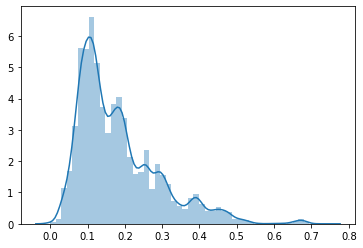

In [77]:
sns.distplot(np.abs(sob_sum)/9636)

In [72]:
np.mean(np.abs(sob_sum))

1752.4727977231112

In [81]:
sob_sum[np.abs(sob_sum)/9636 > 0.4].shape

(1985,)